# 控制系统

## 传递函数

### 无滞后

$H(s)=\frac{3s+3}{4s^2+5s+6}$


    3 s + 3
---------------
4 s^2 + 5 s + 6
 
4 s^2 + 2 s + 3
---------------
4 s^2 + 5 s + 6

A = [[-1.25 -1.5 ]
     [ 1.    0.  ]]

B = [[1.]
     [0.]]

C = [[0.75 0.75]]

D = [[0.]]



[ -6.01988819  -5.94974483  -2.07125493  -6.47817482 -10.96910013
 -16.06721185 -22.3936694  -42.49771621] [-359.90454691 -359.0848707  -383.19859051 -431.56505118 -441.86989765
 -446.41645952 -448.47821443 -449.85667132] [1.e-02 1.e-01 1.e+00 2.e+00 3.e+00 5.e+00 1.e+01 1.e+02]


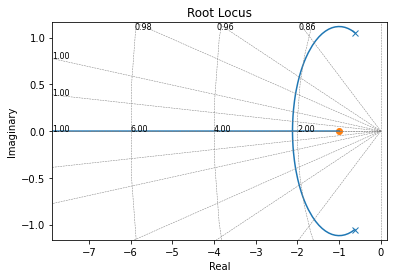

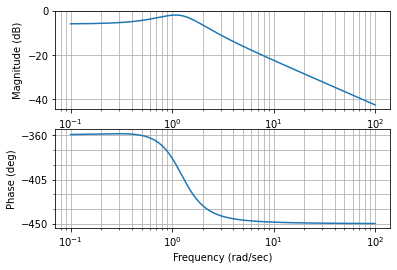

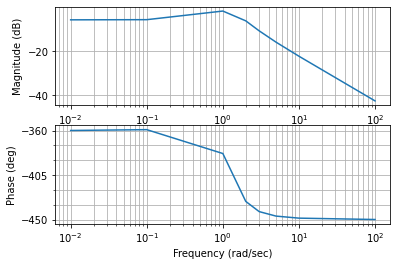

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import control

num = np.array([3, 3])
den = np.array([4, 5, 6])

H = control.tf(num, den)
print(H, 1 - H)
print(control.ss(H)) #转为状态空间表达式

t, y = control.step_response(H) #单位阶跃响应

plt.figure(1)
plt.plot(t, y)
plt.grid()
plt.show()

plt.figure(2)
control.rlocus(H) #根轨迹

plt.figure(3)
[mag, phase, omega] = control.bode(H, dB = True) #打印数据并绘出bode图，使用分贝做单位

plt.figure(4) #在新图上绘制
wlist = [0.01, 0.1, 1, 2, 3, 5, 10, 100] #指定频率
[mag, phase, omega] = control.bode(H, wlist, dB = True)

print(control.mag2db(mag), phase * 180 / np.pi, omega) #分别输出两图的纵坐标和横坐标

### 有滞后

$H(s)=\frac{3}{4s+1}e^{-2s}$


   3
-------
4 s + 1


s^4 - 10 s^3 + 45 s^2 - 105 s + 105
-----------------------------------
s^4 + 10 s^3 + 45 s^2 + 105 s + 105


     3 s^4 - 30 s^3 + 135 s^2 - 315 s + 315
------------------------------------------------
4 s^5 + 41 s^4 + 190 s^3 + 465 s^2 + 525 s + 105



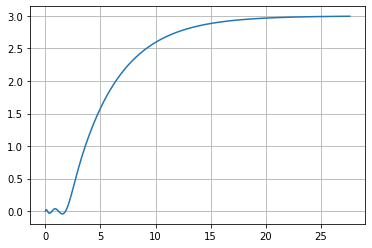

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import control

K = 3
T = 4

num = np.array([K])
den = np.array([T, 1])

H1 = control.tf(num, den)
print(H1)

Tau = 2
N = 4 #Pade近似的最高项系数，可改变

[num_pade, den_pade] = control.pade(Tau, N)
Hpade = control.tf(num_pade, den_pade)
print(Hpade)

H = control.series(H1, Hpade) #连接两个串联的传递函数
print(H)

t, y = control.step_response(H)

plt.plot(t, y)
plt.grid()
plt.show()

### 零极点

$H(s)=\frac{3}{s}\\单位阶跃响应为y(t)=3t$

[0.]
[]
(array([0.]), array([], dtype=float64))


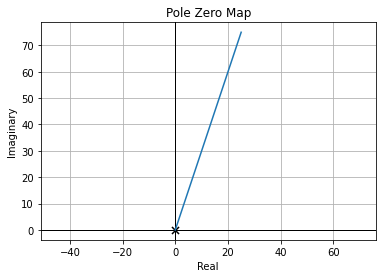

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import control

K = 3

num = np.array([K])
den = np.array([1, 0])
H = control.tf(num, den)

print(control.pole(H)) #极点
print(control.zero(H)) #零点
print(control.pzmap(H)) #极点及零点

t, y = control.step_response(H)
plt.plot(t, y)
plt.grid()
plt.show()

### 控制系统方框图


   10 s + 12
---------------
3 s^2 + 8 s + 5


        20 s^2 + 54 s + 36
-----------------------------------
3 s^4 + 14 s^3 + 33 s^2 + 42 s + 20


           20 s^3 + 54 s^2 + 36 s
---------------------------------------------
3 s^5 + 14 s^4 + 33 s^3 + 82 s^2 + 128 s + 72



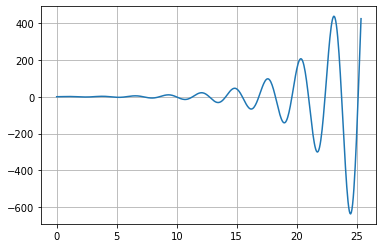

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import control

h1 = control.tf(np.array([2]), np.array([1, 0]))
h2 = control.tf(np.array([1]), np.array([1, 1]))
h3 = control.tf(np.array([7]), np.array([3, 5]))
h4 = control.tf(np.array([2, 3]), np.array([1, 2, 4]))

H1 = control.parallel(h2, h3) #并联
print(H1)
H2 = control.series(H1, h4) #串联
print(H2)
H3 = control.feedback(H2, h1) #反馈
print(H3)

t, y = control.step_response(H3)
plt.plot(t, y)
plt.grid()
plt.show()

## 状态空间表达式

$\dot {x_1}=-3x_1+0.5x_2\\\dot {x_2}=-x_1-7x_2+u\\y=x_1-2x_2$

整理得

$\left[\begin{matrix} \dot {x_1} \\ \dot {x_2} \end{matrix}\right]=\left[\begin{matrix}-3&0.5\\-1&-7\end{matrix}\right]\left[\begin{matrix}x_1\\x_2\end{matrix}\right]+\left[\begin{matrix}0\\1\end{matrix}\right]u\\y=\left[\begin{matrix}1&-2\end{matrix}\right]\left[\begin{matrix}x_1\\x_2\end{matrix}\right]$

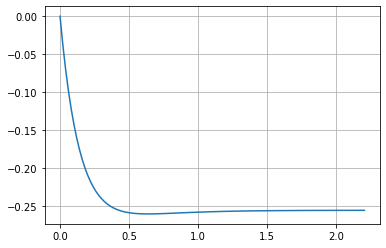


   -2 s - 5.5
-----------------
s^2 + 10 s + 21.5



In [60]:
import matplotlib.pyplot as plt
import control

A = [[-3, 0.5], [-1, -7]]
B = [[0], [1]]
C = [[1, -2]]
D = [[0]]

ssmodel = control.ss(A, B, C, D)

t, y = control.step_response(ssmodel)
plt.plot(t, y)
plt.grid()
plt.show()

# 对多输入系统可能需要slycot库
print(control.ss2tf(ssmodel))